<a href="https://colab.research.google.com/github/RubaAlhajri/Masar/blob/main/MobilePrice_Classification%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 >
 **Mobile Price Range Classifier**

*   Ruba Alhajri
*   Ahad Abdullah ALmutairi
*   samia hussien goda







 In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile

[Dataset source](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv)
---


In this data:
* battery_power:Total energy a battery can store in one time measured in mAh
* blue:Has bluetooth or not
* clock_speed:speed at which microprocessor executes instructions
* dual_sim:Has dual sim support or not
* fc:Front Camera mega pixels
* four_g:Has 4G or not
* int_memory:Internal Memory in Gigabytes
* m_dep:Mobile Depth in cm
* mobile_wt:Weight of mobile phone
* n_cores:Number of cores of processor
* pc:Primary Camera mega pixels
* px_height:Pixel Resolution Height
* px_width:Pixel Resolution Width
* ram:Random Access Memory in Megabytes
* sc_h:Screen Height of mobile in cm
* sc_w:Screen Width of mobile in cm
* talk_time:longest time that a single battery charge will last when you are
* three_g:Has 3G or not
* touch_screen:Has touch screen or not
* wifi:Has wifi or not
* Price range (target) : 0(low cost), 1(medium cost), 2(high cost), 3(high cost)

---
Applied Models:
* Random forest
* Logistic Regression
* KNN





# Part 1

## 1- Data Cleaning

### importing needed libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px


In [ ]:
#reading csv file to df
train_url = "https://filebin.net/za1wkub9f9qcrgq6/train.csv"
df_train= pd.read_csv(train_url)





In [ ]:
# Print the full summary of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#check if there null values
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#check if there duplicated values
df_train.duplicated().sum()

0

In [ ]:
df_train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
# Describing descriptive statistics of price_range
print("\nDescriptive statistics of price_range:\n")
print(df_train['price_range'].describe())


Descriptive statistics of price_range:

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64


In [ ]:
#Check dtype of battery_power
df_train.battery_power.dtype

dtype('int64')

In [ ]:
#show all columns that have a class of float64
df_train.dtypes[df_train.dtypes == 'float64']

clock_speed    float64
m_dep          float64
dtype: object

In [ ]:
#Check for outliers in the dataset
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df_train["battery_power"].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

<Axes: >

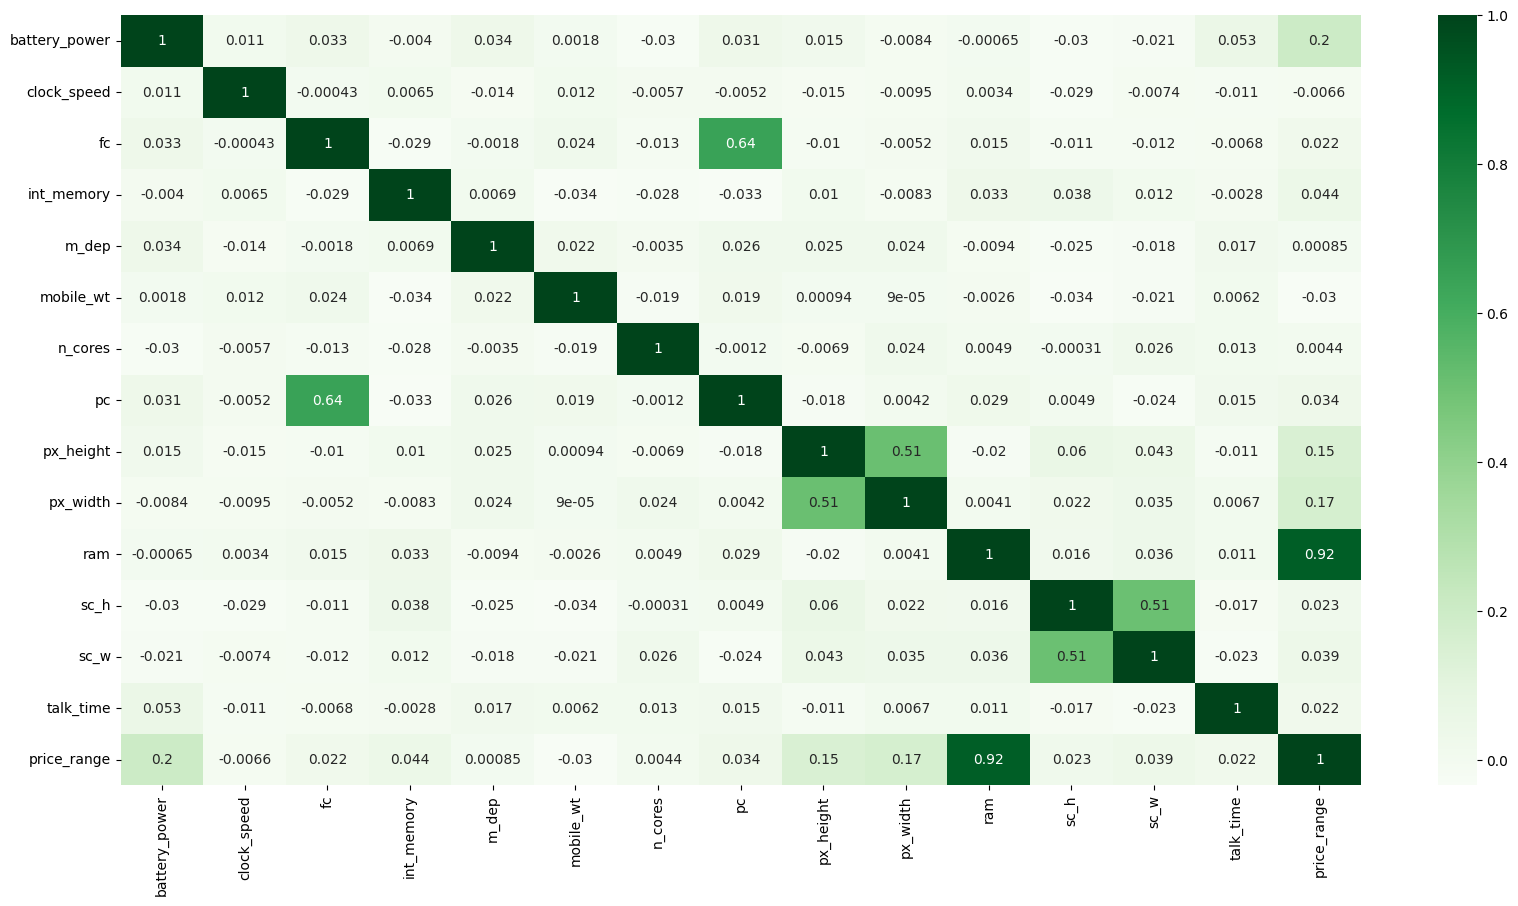

In [ ]:

colmns= ["battery_power","clock_speed","fc","int_memory", "m_dep","mobile_wt","n_cores","pc", "px_height","px_width","ram",
           "sc_h","sc_w","talk_time","price_range"]
plt.figure(figsize=(20,10))
matrix = df_train[colmns].corr()
#plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

## 2- Data Visualization

### Distribution of Price Range in the Dataset

Text(0.5, 1.0, 'Distribution of price ranges in the dataset')

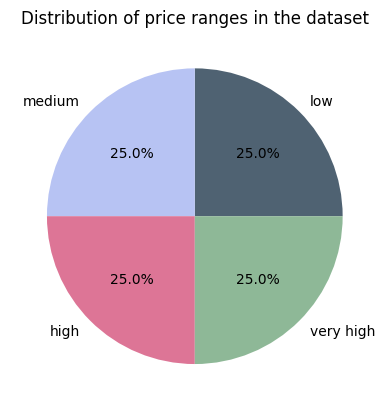

In [ ]:
price_count= df_train["price_range"].value_counts()

labels=["low","medium","high","very high"]
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

plt.pie(price_count,labels=labels,autopct='%1.1f%%', colors=colors)
plt.title("Distribution of price ranges in the dataset")

### histogram of Front Camera And Primary Camera

Text(0.5, 0, 'MegaPixels')

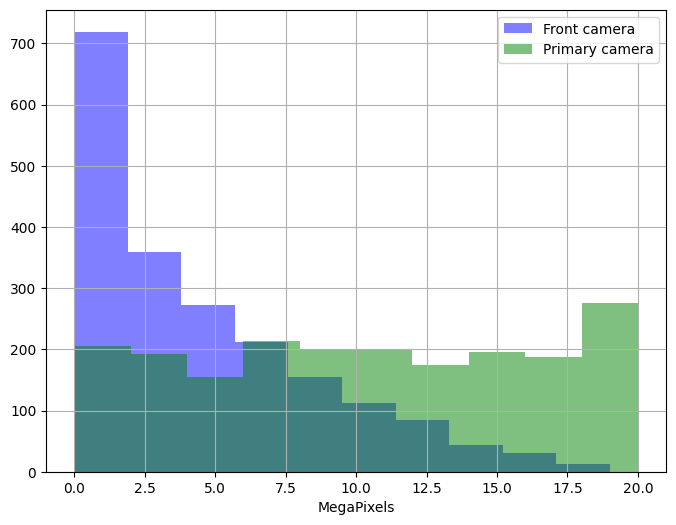

In [ ]:
plt.figure(figsize=(8,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='Green',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Variables that contribute to a mobile phone's price classification

In [ ]:

#how ram, battery power, and px height all contribute to a mobile phone's price classification
fig = px.scatter_3d(df_train.head(1000), x='ram', y='battery_power', z='px_width', color='price_range')
fig.show()

## 3- Data Processing

In [ ]:
print(df_train.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


### Normalization

In [ ]:
cols_to_normalize = ['battery_power', 'clock_speed', 'fc', 'int_memory',
                     'm_dep', 'mobile_wt', 'n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

#  Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_data = scaler.fit(df_train[cols_to_normalize])
df_train[cols_to_normalize] = scaler.transform(df_train[cols_to_normalize])

# Print the scaled DataFrame
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1


In [ ]:
x= df_train.drop("price_range",axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,1,1,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,1,1,1
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,1,1,0
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,1,1,1


In [ ]:
y=df_train["price_range"]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

## 4- ML Model

### Random Forest Model

In [ ]:
Rf_model= RandomForestClassifier(random_state=42)
Rf_model.fit(x_train,y_train)
print("train score for Random Forest is : ",Rf_model.score(x_train,y_train))
print("test  score for Random Forest is : ",Rf_model.score(x_test,y_test))
yRF_pred= Rf_model.predict(x_test)

train score for Random Forest is :  1.0
test  score for Random Forest is :  0.8683333333333333


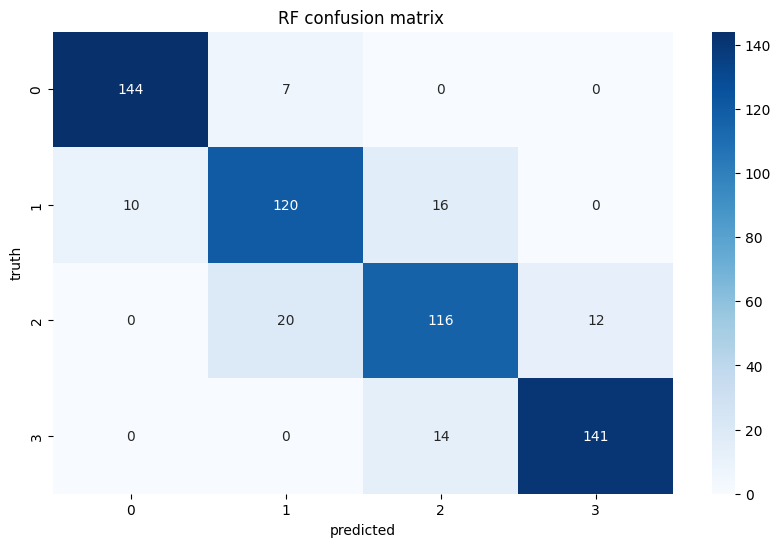

In [ ]:
Rfconfusion= confusion_matrix(y_test,yRF_pred)
plt.figure(figsize=(10,6))
sns.heatmap(Rfconfusion, annot=True, fmt='d', cmap="Blues")

plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("RF confusion matrix ")
plt.show()

In [ ]:
print(classification_report(y_test,yRF_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.82      0.82       146
           2       0.79      0.78      0.79       148
           3       0.92      0.91      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



### Logistic Regression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

print("train score for Logistic Regression: ",logmodel.score(x_train,y_train))
print("test  score for Logistic Regression: ",logmodel.score(x_test,y_test))

yLog_pred = logmodel.predict(x_test)

train score for Logistic Regression:  0.9764285714285714
test  score for Logistic Regression:  0.9583333333333334


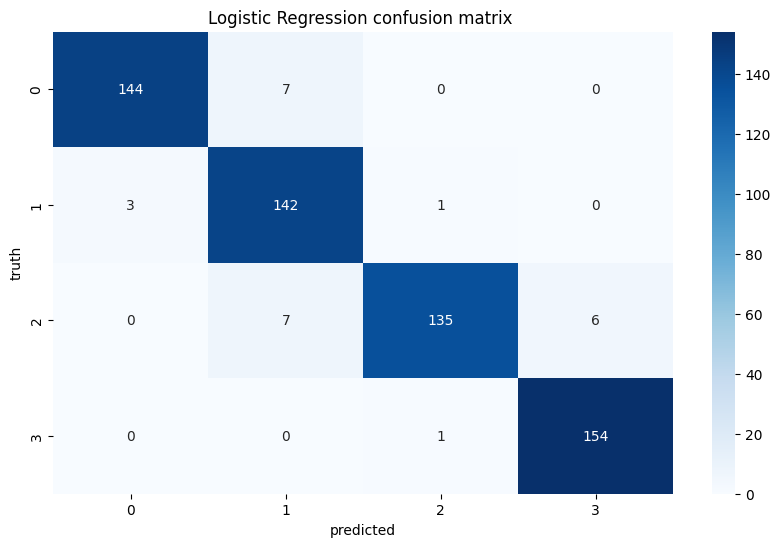

In [ ]:
logconfusion= confusion_matrix(y_test,yLog_pred)
plt.figure(figsize=(10,6))
sns.heatmap(logconfusion, annot=True, fmt='d', cmap="Blues")

plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("Logistic Regression confusion matrix ")
plt.show()

In [ ]:
print(classification_report(y_test,yLog_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



### Knn Model

In [ ]:
#Predictions for the KNN Classifiers
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

knn5.fit(x_train, y_train)
knn1.fit(x_train, y_train)

yKnn_pred_5 = knn5.predict(x_test)
yKnn_pred_1 = knn1.predict(x_test)

In [ ]:
#Predict Accuracy for both k values

print("Accuracy with k=5", accuracy_score(y_test, yKnn_pred_5))
print("Accuracy with k=1", accuracy_score(y_test, yKnn_pred_1))

Accuracy with k=5 0.58
Accuracy with k=1 0.53


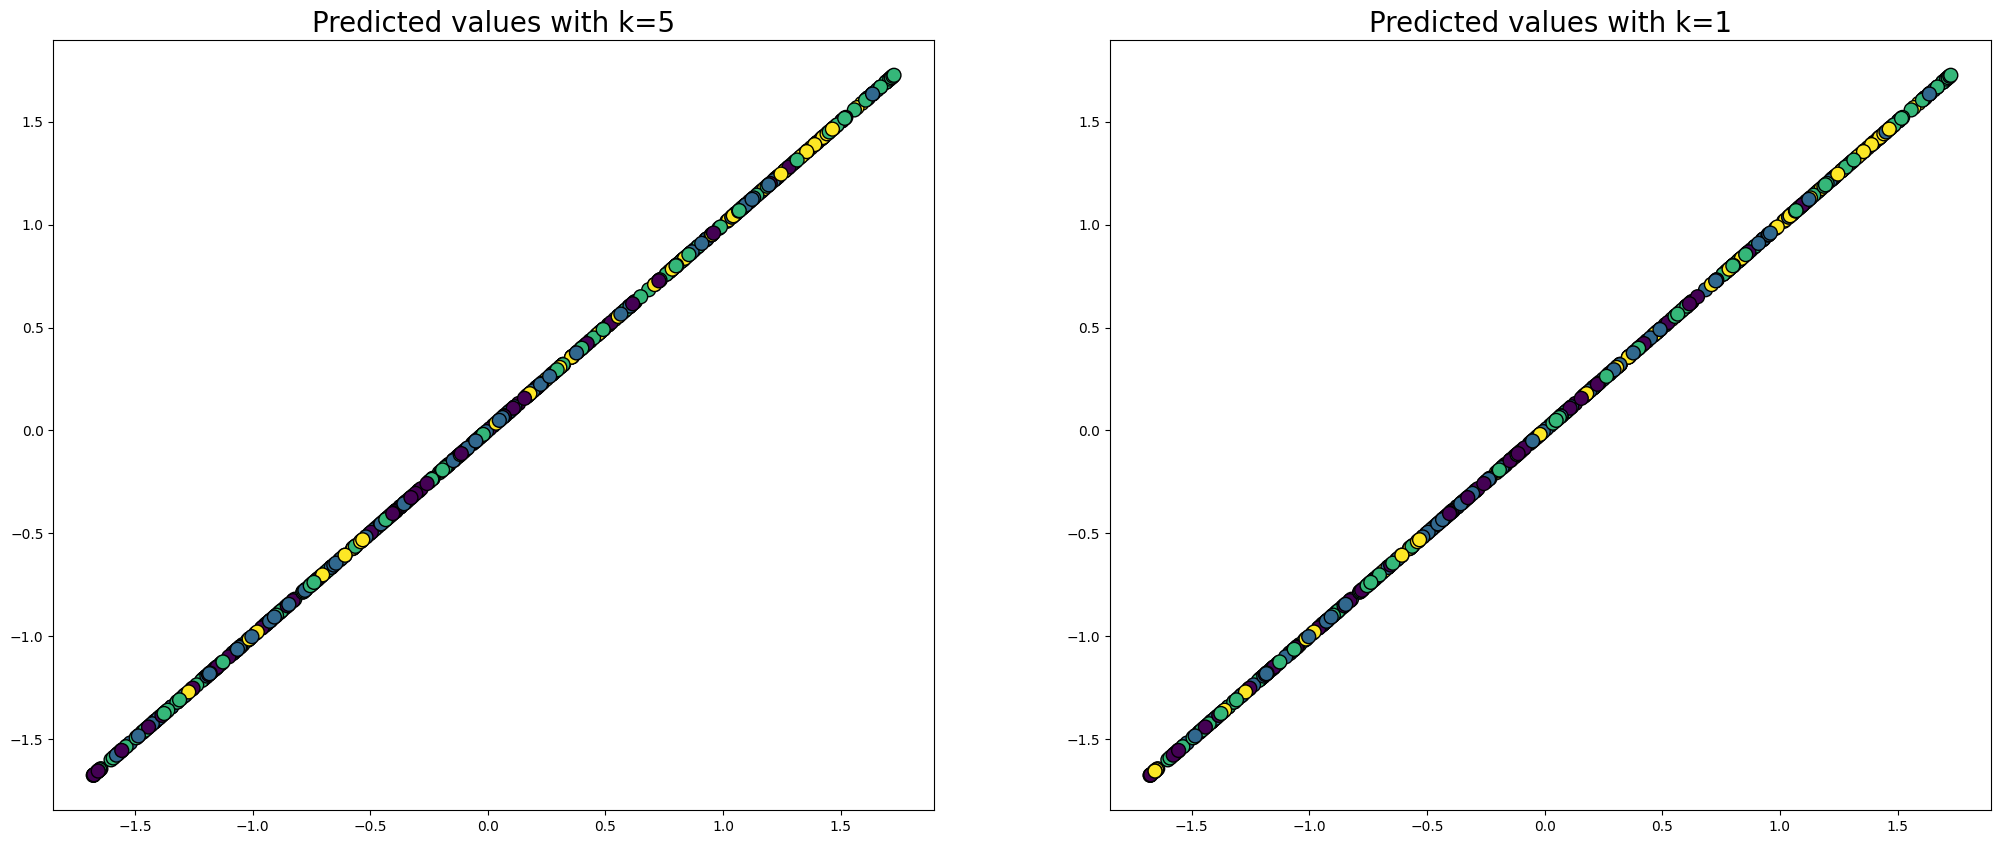

In [ ]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.scatter(x_test['battery_power'], x_test['battery_power'], c=yKnn_pred_5, s=100,edgecolors='black')

plt.title("Predicted values with k=5", fontsize=20)


plt.subplot(1,2,2)
plt.scatter(x_test['battery_power'], x_test['battery_power'], c=yKnn_pred_1,  s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)


plt.show()

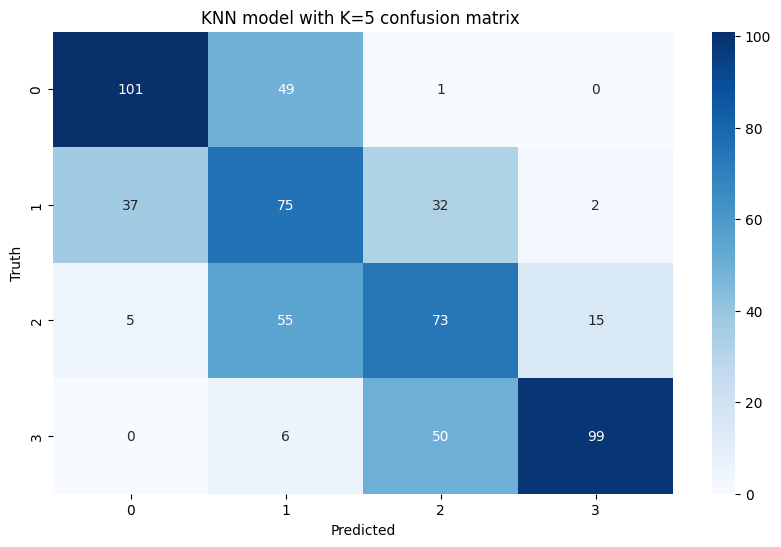

In [ ]:
knnconfusion= confusion_matrix(y_test,yKnn_pred_5)
plt.figure(figsize=(10,6))
sns.heatmap(knnconfusion, annot=True, fmt='d', cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("KNN model with K=5 confusion matrix ")
plt.show()

In [ ]:
print(classification_report(y_test,yKnn_pred_5))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       151
           1       0.41      0.51      0.45       146
           2       0.47      0.49      0.48       148
           3       0.85      0.64      0.73       155

    accuracy                           0.58       600
   macro avg       0.61      0.58      0.59       600
weighted avg       0.61      0.58      0.59       600



So we can conclude that the Logistic Regression Model is the best model for this dataset with 95.8% accuracy

# Part 2

##1. Q1
  Loop:

Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# Using for loop
print("Even numbers from 1 to 10 using for loop:")
for i in range(1, 11):
    if i % 2 == 0:
        print(i, end=" ")

# Using while loop
print("\nEven numbers from 1 to 10 using while loop:")
num = 1
while num <= 10:
    if num % 2 == 0:
        print(num, end=" ")
    num += 1

Even numbers from 1 to 10 using for loop:
2 4 6 8 10 
Even numbers from 1 to 10 using while loop:
2 4 6 8 10 

##2. Q2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
def grade_classifier(score):
  if 90 <= score <= 100:
        return "A"
  elif  80 <= score < 90 :
        return "B"
  elif 70 <= score < 80 :
        return "C"
  elif 60 <= score < 70 :
        return "D"
  else:
        return "F"

print(grade_classifier(88))

B


##3. Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:
age = int(input('Please enter a persons age:'))
if age < 13: print('Child.')
elif age >= 13 and age <= 19: print('Teenager.')

elif age >= 20 and age <= 59: print('Adult.')

elif age >=60: print ('Senior Citizen.')

Please enter a persons age:23
Adult.


##4. Q4

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.

In [ ]:
def multiply_numbers(num1, num2):
    """
    Multiply two numbers together.

    Parameters:
    - num1: First number (int or float)
    - num2: Second number (int or float)

    Returns:
    - Product of num1 and num2
    """
    return num1 * num2

# Test the function with values 5 and 7
result = multiply_numbers(5, 7)
print("Result:", result)

Result: 35


##5. Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.


In [ ]:
# Result function with N
def result(N):

    # iterate from 0 to N+1
    for num in range(N+1):

            # Short-circuit operator is used
            if num % 3 == 0 :
                print(str(num) + " ", end = "")

            else:
                pass


  # input goes here
N = int(input('Please enter Number:'))

  # Calling function
result(N)

Please enter Number:20
0 3 6 9 12 15 18 